In [111]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn import cluster
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## 1. Load Iris Data

In [69]:
train_data = pd.read_csv("iris-train.csv", header=0, skiprows=[1])
test_data = pd.read_csv("iris-test.csv", header=0, skiprows=[1])
train_data

,sepal length,sepal width,petal length,petal width,class
0,4.8,3.0,1.4,0.3,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.4,3.0,1.3,0.2,Iris-setosa
3,5.0,3.4,1.5,0.2,Iris-setosa
4,5.8,2.7,3.9,1.2,Iris-versicolor
...,...,...,...,...,...
115,6.7,3.0,5.2,2.3,Iris-virginica
116,4.9,3.1,1.5,0.1,Iris-setosa
117,7.7,3.8,6.7,2.2,Iris-virginica
118,6.4,2.8,5.6,2.1,Iris-virginica


In [74]:
class2num = {'Iris-versicolor': 0,
             'Iris-setosa': 1, 
             'Iris-virginica': 2}

train_x = train_data[['sepal length', 'sepal width', 'petal length', 'petal width']]
test_x  = test_data[['sepal length', 'sepal width', 'petal length', 'petal width']]
train_y = np.array([class2num[label] for label in train_data['class']])
test_y = np.array([class2num[label] for label in test_data['class']])
test_y

array([1, 0, 1, 2, 1, 0, 2, 1, 1, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 1, 1, 2,
       2, 2, 1, 0, 0, 2, 1, 1])

## 2.1 Clustering with K-means

In [88]:
kmeans = cluster.KMeans(n_clusters=3, random_state=0)
kmeans.fit(train_x)
clusters = kmeans.predict(test_x)
clusters

array([1, 0, 1, 2, 1, 0, 2, 1, 1, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 1, 1, 0,
       2, 2, 1, 0, 0, 2, 1, 1])

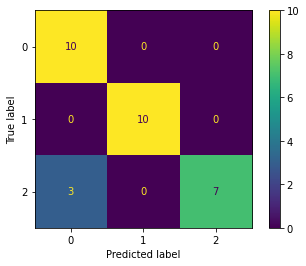

In [89]:
cm = confusion_matrix(test_y, clusters)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

## 2.2 Clustering with Hierarchical clustering

In [90]:
clustering = cluster.AgglomerativeClustering(n_clusters=3)
clusters = clustering.fit_predict(test_x)
clusters

array([1, 2, 1, 0, 1, 2, 0, 1, 1, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 2, 0, 1, 1], dtype=int64)

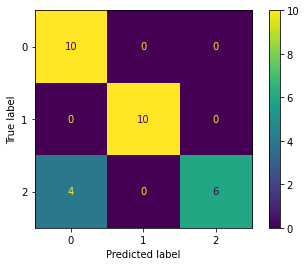

In [92]:
class2num = {'Iris-versicolor': 2,
             'Iris-setosa': 1, 
             'Iris-virginica': 0}
true_y = np.array([class2num[label] for label in test_data['class']])

cm = confusion_matrix(true_y, clusters)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

## 3.1 Classification with Logistic Regression

In [98]:
clf = LogisticRegression(random_state=0)
clf.fit(train_x, train_y)
pred_y = clf.predict(test_x)
pred_y

array([1, 0, 1, 2, 1, 0, 2, 1, 1, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 1, 1, 2,
       2, 2, 1, 0, 0, 2, 1, 1])

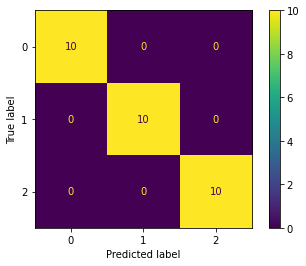

In [100]:
cm = confusion_matrix(test_y, pred_y)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

## 3.2 Classification with Decision Tree

In [104]:
clf = tree.DecisionTreeClassifier()
clf.fit(train_x, train_y)
pred_y = clf.predict(test_x)

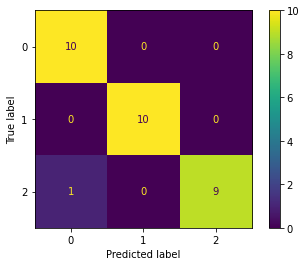

In [105]:
cm = confusion_matrix(test_y, pred_y)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

[Text(0.5, 0.9, 'X[2] <= 2.45\ngini = 0.667\nsamples = 120\nvalue = [40, 40, 40]'),
 Text(0.4230769230769231, 0.7, 'gini = 0.0\nsamples = 40\nvalue = [0, 40, 0]'),
 Text(0.5769230769230769, 0.7, 'X[3] <= 1.75\ngini = 0.5\nsamples = 80\nvalue = [40, 0, 40]'),
 Text(0.3076923076923077, 0.5, 'X[2] <= 4.95\ngini = 0.133\nsamples = 42\nvalue = [39, 0, 3]'),
 Text(0.15384615384615385, 0.3, 'X[3] <= 1.65\ngini = 0.051\nsamples = 38\nvalue = [37, 0, 1]'),
 Text(0.07692307692307693, 0.1, 'gini = 0.0\nsamples = 37\nvalue = [37, 0, 0]'),
 Text(0.23076923076923078, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.3, 'X[3] <= 1.55\ngini = 0.5\nsamples = 4\nvalue = [2, 0, 2]'),
 Text(0.38461538461538464, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.5384615384615384, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0]'),
 Text(0.8461538461538461, 0.5, 'X[2] <= 4.85\ngini = 0.051\nsamples = 38\nvalue = [1, 0, 37]'),
 Text(0.7692307692307693, 0.3, 'X[0] <= 5.

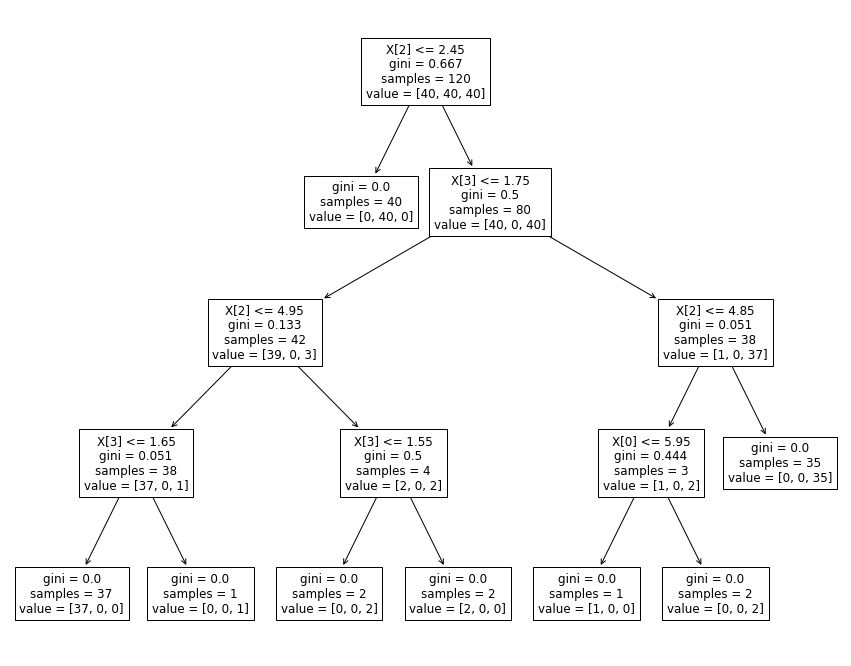

In [115]:
plt.figure(figsize=(15, 12))
tree.plot_tree(clf)